In [21]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/Dataset of Diabetes .csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [7]:
df.isnull().sum()

,0
ID,0
No_Pation,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


In [9]:
df['CLASS']

,CLASS
0,N
1,N
2,N
3,N
4,N
...,...
995,Y
996,Y
997,Y
998,Y


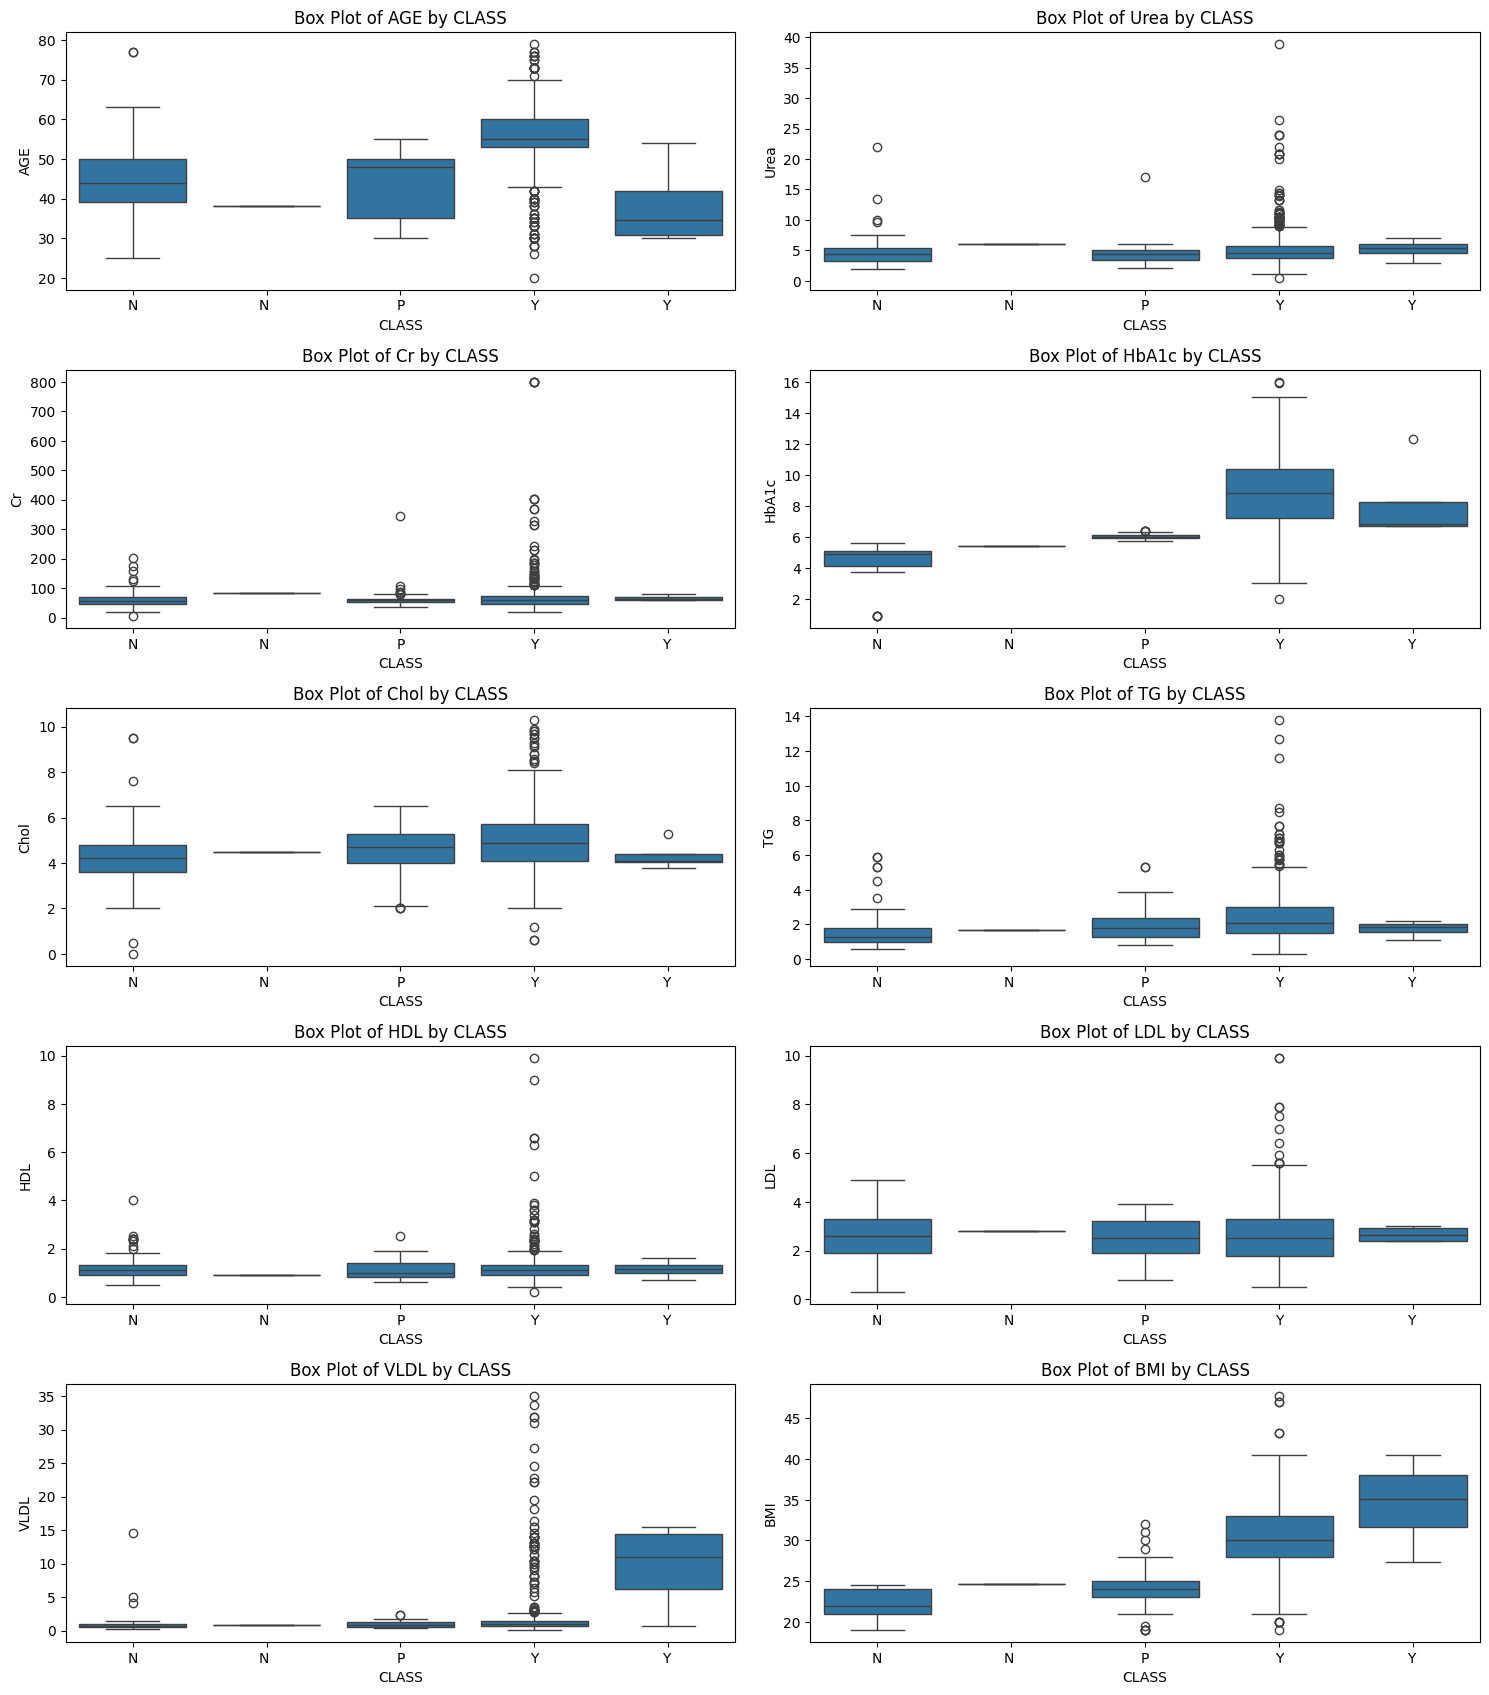

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns for plotting, excluding identifiers
numerical_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Create box plots for each numerical column, grouped by 'CLASS'
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 2, i) # Adjust subplot grid as needed based on the number of columns
    sns.boxplot(x='CLASS', y=col, data=df)
    plt.title(f'Box Plot of {col} by CLASS')
    plt.xlabel('CLASS')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

LABEL ENCODING


In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()
df['Gender']=df['Gender'].map({'M':1,'F':0})

In [13]:
X=df.drop('CLASS',axis=1)
y=df['CLASS']

Standard Scaler

In [15]:
x_transformed=scaler.fit_transform(X)
print(x_transformed)

[[ 0.67213966 -0.07474738 -1.14098349 ... -1.08545731 -0.369958
  -1.12462205]
 [ 1.64185199 -0.06993954  0.87643687 ... -0.4573978  -0.34264878
  -1.32623876]
 [ 0.33086751 -0.06586919 -1.14098349 ... -1.08545731 -0.369958
  -1.12462205]
 ...
 [ 1.36716953 -0.0541266   0.87643687 ... -0.18822944  1.70554268
  -0.43912523]
 [-1.0050881  -0.07296316  0.87643687 ...  0.2603845   3.31678663
   2.2020537 ]
 [-0.38497163 -0.07294836  0.87643687 ...  0.35010729 -0.31533956
   0.68992836]]


In [16]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_transformed=sc.fit_transform(X)
print(x_transformed)

[[6.27033792e-01 2.36652398e-04 0.00000000e+00 ... 1.14583333e-01
  1.14613181e-02 1.73913043e-01]
 [9.18648310e-01 4.52015094e-04 1.00000000e+00 ... 1.87500000e-01
  1.43266476e-02 1.39130435e-01]
 [5.24405507e-01 6.34342961e-04 0.00000000e+00 ... 1.14583333e-01
  1.14613181e-02 1.73913043e-01]
 ...
 [8.36045056e-01 1.16034176e-03 1.00000000e+00 ... 2.18750000e-01
  2.29226361e-01 2.92173913e-01]
 [1.22653317e-01 3.16574945e-04 1.00000000e+00 ... 2.70833333e-01
  3.98280802e-01 7.47826087e-01]
 [3.09136421e-01 3.17237762e-04 1.00000000e+00 ... 2.81250000e-01
  1.71919771e-02 4.86956522e-01]]


ADULT INCOME

In [27]:
data=pd.read_csv("/content/adult.csv")

In [28]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['income']=le.fit_transform(data['income'])

In [30]:
X=data.drop('income',axis=1)
y=data['income']

In [31]:
numeric_cols=X.select_dtypes(include=['int64','float64']).columns
categorical_cols=X.select_dtypes(include=['object']).columns

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_standard=X.copy()
x_standard[numeric_cols]=scaler.fit_transform(x_standard[numeric_cols])
print(x_standard)

            age     workclass    fnlwgt     education  educational-num  \
0     -0.995129       Private  0.351675          11th        -1.197259   
1     -0.046942       Private -0.945524       HS-grad        -0.419335   
2     -0.776316     Local-gov  1.394723    Assoc-acdm         0.747550   
3      0.390683       Private -0.277844  Some-college        -0.030373   
4     -1.505691             ? -0.815954  Some-college        -0.030373   
...         ...           ...       ...           ...              ...   
48837 -0.849254       Private  0.640492    Assoc-acdm         0.747550   
48838  0.098933       Private -0.334178       HS-grad        -0.419335   
48839  1.411808       Private -0.357510       HS-grad        -0.419335   
48840 -1.213941       Private  0.111984       HS-grad        -0.419335   
48841  0.974183  Self-emp-inc  0.930494       HS-grad        -0.419335   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_standard=X.copy()
x_standard[numeric_cols]=scaler.fit_transform(x_standard[numeric_cols])
print(x_standard)

            age     workclass    fnlwgt     education  educational-num  \
0      0.109589       Private  0.145129          11th         0.400000   
1      0.287671       Private  0.052451       HS-grad         0.533333   
2      0.150685     Local-gov  0.219649    Assoc-acdm         0.733333   
3      0.369863       Private  0.100153  Some-college         0.600000   
4      0.013699             ?  0.061708  Some-college         0.600000   
...         ...           ...       ...           ...              ...   
48837  0.136986       Private  0.165763    Assoc-acdm         0.733333   
48838  0.315068       Private  0.096129       HS-grad         0.533333   
48839  0.561644       Private  0.094462       HS-grad         0.533333   
48840  0.068493       Private  0.128004       HS-grad         0.533333   
48841  0.479452  Self-emp-inc  0.186482       HS-grad         0.533333   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-